In [2]:
# Ngày 28 tháng 10 năm 2021
# Bài tập: Sound Detector  
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile

Fs:  48000
data:  (139264, 2)
NB_FRAMES:  280
start_point:  57
end_point:  141
start_t:  0.6200000000000001
end_t:  1.46


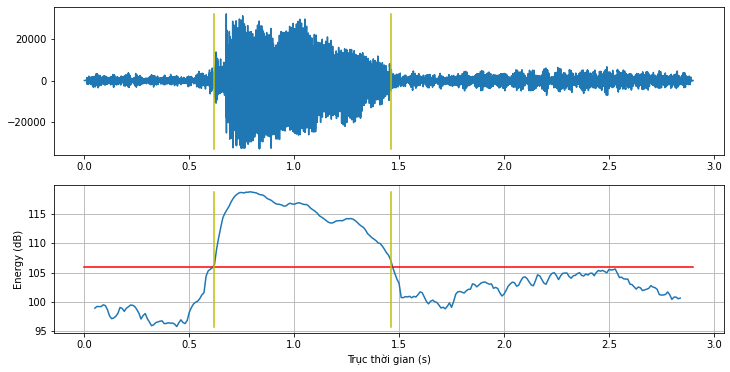

In [61]:
def energy_db(xn, begin_frame, end_frame):
    xn_frame = xn[begin_frame : end_frame]
    energy_frame = 0
    for i in range(len(xn_frame)):
        energy_frame += 1.0 * xn_frame[i] * xn_frame[i]
    energy_frame_db = 10 * math.log10(energy_frame)
    return energy_frame_db

def extract_energy(xn, Fs):
    t_energy = []
    energy = []
    
    FRAME_LENGTH = int(0.1 * Fs) # s
    FRAME_SHIFT = int(0.01 * Fs) # s
    
    NB_FRAMES = int((len(xn) - FRAME_LENGTH) / FRAME_SHIFT)
    print("NB_FRAMES: ", NB_FRAMES)
    
    for i in range(NB_FRAMES):
        begin_frame = i * FRAME_SHIFT
        end_frame = begin_frame + FRAME_LENGTH
        energy_frame = energy_db(xn, begin_frame, end_frame)        
        energy.append(energy_frame)
        
        t_frame = (begin_frame + FRAME_LENGTH / 2) / Fs
        t_energy.append(t_frame)
        
    return t_energy, energy

def detect_start_end(energy, threshold):
    start_point = -1
    end_point = len(energy) - 1
    
    for idx in range(len(energy)):
        e = energy[idx]
        if e > threshold:
            end_point = idx    
            if start_point == -1: start_point = idx
    
    print("start_point: ", start_point)
    print("end_point: ", end_point)
    
    return start_point, end_point
    
def process_file(filewav, threshold):
    Fs, data = wavfile.read(filewav)
    print("Fs: ", Fs)
    print("data: ", data.shape)
    xn = data[:,0]
    n = np.arange(len(xn))
    t = n / Fs
    xn_min = min(xn)
    xn_max = max(xn)
    
    t_energy, energy = extract_energy(xn, Fs)
    energy_min = min(energy)
    energy_max = max(energy)
    start_point, end_point = detect_start_end(energy, threshold)
    
    start_t = start_point * 0.01 + 0.05
    end_t = end_point * 0.01 + 0.05
    print("start_t: ", start_t)
    print("end_t: ", end_t)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2,1,1)
    plt.plot(t, xn)  
    
    # Draw start line 
    x_values = [start_t, start_t]
    y_values = [xn_min, xn_max]
    plt.plot(x_values, y_values, "y-")
    
    # Draw end line 
    x_values = [end_t, end_t]
    y_values = [xn_min, xn_max]
    plt.plot(x_values, y_values, "y-")
    
    plt.subplot(2,1,2)
    plt.plot(t_energy, energy)
    plt.xlabel("Trục thời gian (s)")
    plt.ylabel("Energy (dB)")
    plt.grid()
    
    # Draw threshold line contour
    x_values = [0, t[-1]]
    y_values = [threshold, threshold]
    plt.plot(x_values, y_values, "r-")
    
    # Draw start line 
    x_values = [start_t, start_t]
    y_values = [energy_min, energy_max]
    plt.plot(x_values, y_values, "y-")
    
    # Draw end line 
    x_values = [end_t, end_t]
    y_values = [energy_min, energy_max]
    plt.plot(x_values, y_values, "y-")
    plt.show()

process_file('a.wav', 106)

Fs:  48000
data:  (146432, 2)
NB_FRAMES:  295
start_point:  75
end_point:  160
start_t:  0.8
end_t:  1.6500000000000001


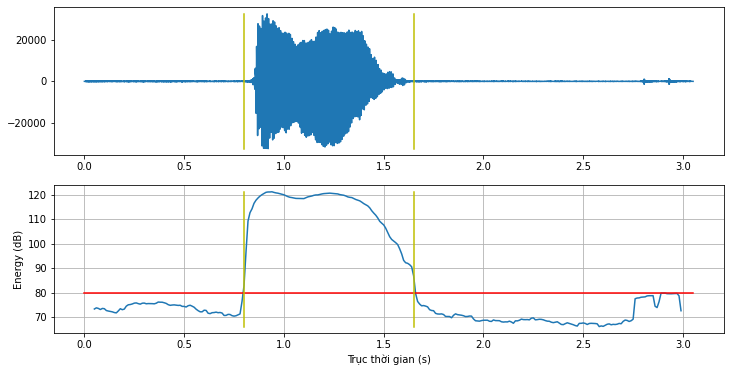

In [63]:
process_file('i.wav', 80)

Fs:  48000
data:  (104448, 2)
NB_FRAMES:  207
start_point:  77
end_point:  183
start_t:  0.8200000000000001
end_t:  1.8800000000000001


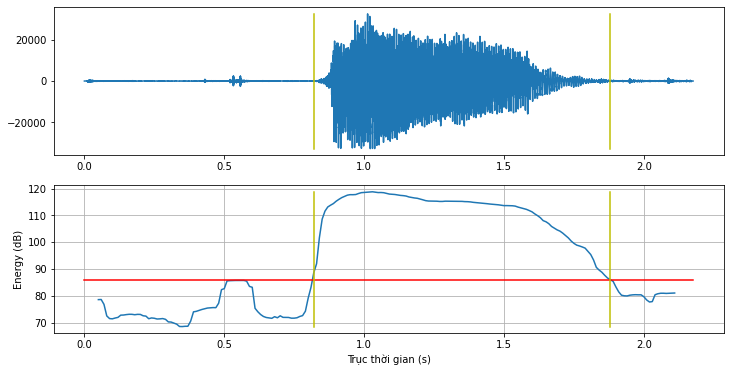

In [65]:
process_file('e.wav', 86)